In [2]:
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/solar.csv
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/wind.csv
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/average_cost.csv

--2022-06-19 20:19:39--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/solar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10901 (11K) [text/plain]
Saving to: ‘solar.csv’

solar.csv           100%[===================>]  10.65K  --.-KB/s    in 0s      

2022-06-19 20:19:39 (83.3 MB/s) - ‘solar.csv’ saved [10901/10901]

--2022-06-19 20:19:39--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/wind.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import re

In [4]:
!pip install plotly numpy pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Solar table

In [5]:
path_s = "/content/solar.csv"
solar = pd.read_csv(path_s)
solar.head()

,date,solar_mwh,solar_capacity
0,2009-02-23,132.096789,30.0
1,2009-03-01,159.502398,30.0
2,2009-03-05,150.760361,19.0
3,2009-05-01,210.070530,12.6
4,2009-05-08,142.783409,230.0


Average cost table

In [6]:
path_av = "/content/average_cost.csv"
average = pd.read_csv(path_av)
average.head()

,year,gas_mwh,solar_mwh,wind_mwh
0,2009,57.645367,167.665053,74.325252
1,2010,56.831714,139.802244,65.501337
2,2011,46.000093,110.855044,47.776246
3,2012,44.487503,84.095776,40.114226
4,2013,43.172493,68.881974,28.722950


Wind table

In [7]:
path_w = "/content/wind.csv"
wind = pd.read_csv(path_w)
wind.head()

,date,wind_mwh,wind_capacity
0,2009-01-28,54.096687,50.4
1,2009-01-30,62.326818,98.9
2,2009-02-02,52.531046,99.0
3,2009-02-05,93.790168,150.0
4,2009-02-05,96.546638,51.0


# Как зависит прогнозируемая добыча от прогнозируемой цены solar?


solar_mwh(solar) dependence on solar_capacity(solar)

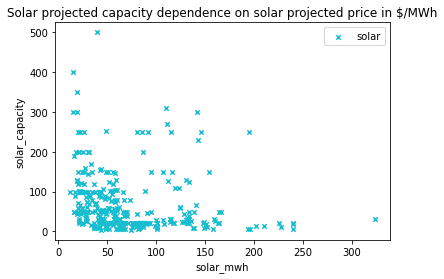

In [8]:
solar2_scatter = solar.plot.scatter(
    x='solar_mwh',
    y='solar_capacity',
    color='C9', 
    title='Solar projected capacity dependence on solar projected price in $/MWh', 
    label='solar', 
    marker='x'
)

plt.savefig('solar2_scatter.pdf', dpi=600)
plt.savefig('solar2_scatter.png', dpi=600)

#Как зависит прогнозируемая добыча от прогнозируемой цены wind?

wind_mwh(wind) dependence on wind_capacity(wind)

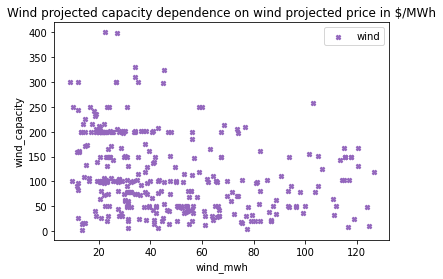

In [17]:
wind2_scatter = wind.plot.scatter(
    x='wind_mwh', 
    y='wind_capacity', 
    color='C4', 
    title='Wind projected capacity dependence on wind projected price in $/MWh', 
    label='wind', 
    marker='X'
)

plt.savefig('wind2_scatter.pdf', dpi=600)
plt.savefig('wind2_scatter.png', dpi=600)

# Altogether

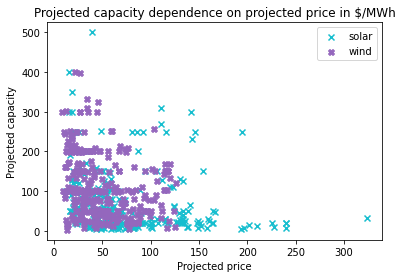

In [16]:
X = solar['solar_mwh']
Y = solar['solar_capacity']
Z = wind['wind_mwh']
L = wind['wind_capacity']

plt.scatter(
    X,
    Y,
    color='C9',
    label='solar',
    marker='x'
)
plt.scatter(
    Z,
    L,
    color='C4',
    label='wind',
    marker='X'
)
plt.title('Projected capacity dependence on projected price in $/MWh')
plt.ylabel('Projected capacity')
plt.xlabel('Projected price')
plt.legend(loc='best')

plt.savefig('1_solar_wind_projected.png', dpi=600)
plt.savefig('1_solar_wind_projected.pdf', dpi=600)

plt.show()

ответ